<a href="https://colab.research.google.com/github/ugurtrsahin/codespaces-jupyter/blob/main/Tens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yeni Bölüm

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class ElektronSpin:
    HBAR = 1.054571817e-34  # Planck sabiti (J⋅s)
    ELECTRON_MASS = 9.1093837015e-31  # Elektron kütlesi (kg)
    MAGNETIC_MOMENT = 9.2847647043e-24  # Bohr magnetonu (J/T)

    def __init__(self):
        self.spin = np.random.choice([-1, 1])  # -1: down, 1: up
        self.theta = np.random.uniform(0, np.pi)
        self.phi = np.random.uniform(0, 2*np.pi)

    def spin_vector(self):
        x = np.sin(self.theta) * np.cos(self.phi)
        y = np.sin(self.theta) * np.sin(self.phi)
        z = np.cos(self.theta)
        return np.array([x, y, z]) * 0.5 * self.spin

    def energy_in_magnetic_field(self, B):
        return -self.MAGNETIC_MOMENT * B * self.spin

    def precession_frequency(self, B):
        return self.MAGNETIC_MOMENT * B / self.HBAR

def simulate_electrons(num_electrons, B):
    electrons = [ElektronSpin() for _ in range(num_electrons)]

    energies = [e.energy_in_magnetic_field(B) for e in electrons]
    frequencies = [e.precession_frequency(B) for e in electrons]

    up_spins = sum(1 for e in electrons if e.spin == 1)
    down_spins = num_electrons - up_spins

    fig = plt.figure(figsize=(15, 5))

    # Spin vektörlerini çiz
    ax1 = fig.add_subplot(131, projection='3d')
    for e in electrons:
        vec = e.spin_vector()
        ax1.quiver(0, 0, 0, vec[0], vec[1], vec[2], color='b' if e.spin == 1 else 'r')
    ax1.set_title("Elektron Spin Vektörleri")
    ax1.set_xlim(-0.5, 0.5)
    ax1.set_ylim(-0.5, 0.5)
    ax1.set_zlim(-0.5, 0.5)

    # Enerji histogramı
    ax2 = fig.add_subplot(132)
    ax2.hist(energies, bins=20)
    ax2.set_title("Enerji Dağılımı")
    ax2.set_xlabel("Enerji (J)")
    ax2.set_ylabel("Elektron Sayısı")

    # Presesyon frekansı histogramı
    ax3 = fig.add_subplot(133)
    ax3.hist(frequencies, bins=20)
    ax3.set_title("Presesyon Frekansı Dağılımı")
    ax3.set_xlabel("Frekans (Hz)")
    ax3.set_ylabel("Elektron Sayısı")

    plt.tight_layout()
    plt.savefig('electron_spin_simulation.png')
    plt.close()

    return up_spins, down_spins, np.mean(energies), np.mean(frequencies)

# Simülasyon parametreleri
NUM_ELECTRONS = 1000
MAGNETIC_FIELD = 1.0  # Tesla

# Simülasyonu çalıştır
up, down, avg_energy, avg_frequency = simulate_electrons(NUM_ELECTRONS, MAGNETIC_FIELD)

print(f"Toplam elektron sayısı: {NUM_ELECTRONS}")
print(f"Up spin sayısı: {up}")
print(f"Down spin sayısı: {down}")
print(f"Ortalama enerji: {avg_energy:.2e} J")
print(f"Ortalama presesyon frekansı: {avg_frequency:.2e} Hz")
print("Grafik 'electron_spin_simulation.png' olarak kaydedildi.")

Toplam elektron sayısı: 1000
Up spin sayısı: 496
Down spin sayısı: 504
Ortalama enerji: 7.43e-26 J
Ortalama presesyon frekansı: 8.80e+10 Hz
Grafik 'electron_spin_simulation.png' olarak kaydedildi.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class ElektronSpin:
    def __init__(self):

np.randit (s)
spin = (1,0)
        self.spin = np.random.choice([-1/2, 1/2])  # -1: down, 1: up
        self.theta = np.random.uniform(0, np.pi)
        self.phi = np.random.uniform(0, 2*np.pi)

    def spin_z(self):
        return 0.5 * self.spin * np.cos(self.theta)

    def update(self, dt, B):
        # Basit bir presesyon modeli
        omega = B  # Presesyon frekansı (B'ye orantılı)
        self.phi += omega * dt
        self.phi %= 2*np.pi

def create_spin_matrix(size):
    return [[ElektronSpin() for _ in range(size)] for _ in range(size)]

def matrix_to_array(matrix):
    return np.array([[spin.spin_z() for spin in row] for row in matrix])

def update_spins(matrix, dt, B):
    for row in matrix:
        for spin in row:
            spin.update(dt, B)

# Parametre ayarları
SIZE = 256
B = 1.0  # Manyetik alan şiddeti
dt = 0.01  # Zaman adımı

# Spin matrisini oluştur
spin_matrix = create_spin_matrix(SIZE)

# Görselleştirme ayarları
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(matrix_to_array(spin_matrix), cmap='coolwarm', animated=True, vmin=-0.5, vmax=0.5)
plt.colorbar(im, label='Spin-z Değeri')
ax.set_title('256x256 Elektron Spin Matrisi')

# Animasyon fonksiyonu
def update(frame):
    update_spins(spin_matrix, dt, B)
    im.set_array(matrix_to_array(spin_matrix))
    ax.set_title(f'256x256 Elektron Spin Matrisi (t = {frame*dt:.2f} s)')
    return im,

# Animasyonu oluştur ve kaydet
anim = FuncAnimation(fig, update, frames=100, interval=50, blit=True)
anim.save('spin_matrix_animation.gif', writer='pillow', fps=20)

plt.close()

print("Animasyon 'spin_matrix_animation.gif' olarak kaydedildi.")

# Son durumun analizini yap
final_matrix = matrix_to_array(spin_matrix)
up_spins = np.sum(final_matrix > 0)
down_spins = np.sum(final_matrix < 0)
avg_spin = np.mean(final_matrix)

print(f"\nSon durum analizi:")
print(f"Yukarı spin sayısı: {up_spins}")
print(f"Aşağı spin sayısı: {down_spins}")
print(f"Ortalama spin-z değeri: {avg_spin:.4f}")

Animasyon 'spin_matrix_animation.gif' olarak kaydedildi.

Son durum analizi:
Yukarı spin sayısı: 32697
Aşağı spin sayısı: 32839
Ortalama spin-z değeri: -0.0005


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.stats import entropy

class ElektronSpin:
    def __init__(self):
        self.spin = np.random.choice([-1, 1])  # -1: down, 1: up
        self.theta = np.random.uniform(0, np.pi)
        self.phi = np.random.uniform(0, 2*np.pi)

    def spin_z(self):
        return 0.5 * self.spin * np.cos(self.theta)

    def update(self, dt, B, g):
        if g:  # Gözlemci varsa
            # Spin'i ölç ve kuantize et
            self.spin = 1 if self.spin_z() > 0 else -1
            self.theta = 0 if self.spin == 1 else np.pi
        else:  # Gözlemci yoksa
            # Basit bir presesyon modeli
            omega = B  # Presesyon frekansı (B'ye orantılı)
            self.phi += omega * dt
            self.phi %= 2*np.pi
            # Rastgele kuantum dalgalanmalar ekle
            self.theta += np.random.normal(0, 0.1)
            self.theta = np.clip(self.theta, 0, np.pi)

def create_spin_matrix(size):
    return [[ElektronSpin() for _ in range(size)] for _ in range(size)]

def matrix_to_array(matrix):
    return np.array([[spin.spin_z() for spin in row] for row in matrix])

def update_spins(matrix, dt, B, g):
    for row in matrix:
        for spin in row:
            spin.update(dt, B, g)

def calculate_entropy(matrix):
    flat_matrix = matrix.flatten()
    hist, _ = np.histogram(flat_matrix, bins=20, density=True)
    return entropy(hist)

# Parametre ayarları
SIZE = 128
B = 1.0  # Manyetik alan şiddeti
dt = 0.01  # Zaman adımı

# Gözlemci değişkeni
g = bool(np.random.choice([0, 1]))

# Spin matrisini oluştur
spin_matrix = create_spin_matrix(SIZE)

# Görselleştirme ayarları
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle(f"Kuantum Spin Gözlemci Etkisi Simülasyonu (Gözlemci: {'Var' if g else 'Yok'})", fontsize=16)

# Spin matrisi görselleştirmesi
im = axs[0, 0].imshow(matrix_to_array(spin_matrix), cmap='coolwarm', animated=True, vmin=-0.5, vmax=0.5)
axs[0, 0].set_title('Spin-z Dağılımı')
plt.colorbar(im, ax=axs[0, 0], label='Spin-z Değeri')

# Histogram
hist_data, hist_bins, _ = axs[0, 1].hist(matrix_to_array(spin_matrix).flatten(), bins=50, density=True)
axs[0, 1].set_title('Spin-z Dağılım Histogramı')
axs[0, 1].set_xlabel('Spin-z Değeri')
axs[0, 1].set_ylabel('Yoğunluk')

# Entropi grafiği
entropy_values = [calculate_entropy(matrix_to_array(spin_matrix))]
entropy_line, = axs[1, 0].plot(entropy_values)
axs[1, 0].set_title('Sistem Entropisi')
axs[1, 0].set_xlabel('Zaman Adımı')
axs[1, 0].set_ylabel('Entropi')
axs[1, 0].set_ylim(0, 5)

# Ortalama spin-z grafiği
avg_spin_values = [np.mean(matrix_to_array(spin_matrix))]
avg_spin_line, = axs[1, 1].plot(avg_spin_values)
axs[1, 1].set_title('Ortalama Spin-z Değeri')
axs[1, 1].set_xlabel('Zaman Adımı')
axs[1, 1].set_ylabel('Ortalama Spin-z')
axs[1, 1].set_ylim(-0.5, 0.5)

# Animasyon fonksiyonu
def update(frame):
    update_spins(spin_matrix, dt, B, g)
    matrix_data = matrix_to_array(spin_matrix)

    # Spin matrisi güncellemesi
    im.set_array(matrix_data)

    # Histogram güncellemesi
    axs[0, 1].clear()
    axs[0, 1].hist(matrix_data.flatten(), bins=50, density=True)
    axs[0, 1].set_title('Spin-z Dağılım Histogramı')
    axs[0, 1].set_xlabel('Spin-z Değeri')
    axs[0, 1].set_ylabel('Yoğunluk')

    # Entropi güncellemesi
    entropy_values.append(calculate_entropy(matrix_data))
    entropy_line.set_data(range(len(entropy_values)), entropy_values)
    axs[1, 0].set_xlim(0, len(entropy_values))

    # Ortalama spin-z güncellemesi
    avg_spin_values.append(np.mean(matrix_data))
    avg_spin_line.set_data(range(len(avg_spin_values)), avg_spin_values)
    axs[1, 1].set_xlim(0, len(avg_spin_values))

    fig.suptitle(f"Kuantum Spin Gözlemci Etkisi Simülasyonu (Gözlemci: {'Var' if g else 'Yok'}, t = {frame*dt:.2f} s)", fontsize=16)

    return im, entropy_line, avg_spin_line

# Animasyonu oluştur ve kaydet
anim = FuncAnimation(fig, update, frames=200, interval=50, blit=False)
anim.save('quantum_observer_effect.gif', writer='pillow', fps=20)

plt.close()

print(f"Gözlemci {'var' if g else 'yok'}.")
print("Animasyon 'quantum_observer_effect.gif' olarak kaydedildi.")

Gözlemci var.
Animasyon 'quantum_observer_effect.gif' olarak kaydedildi.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x7c977a168ee0> (for post_execute):


TypeError: cos(): argument 'input' (position 1) must be Tensor, not float

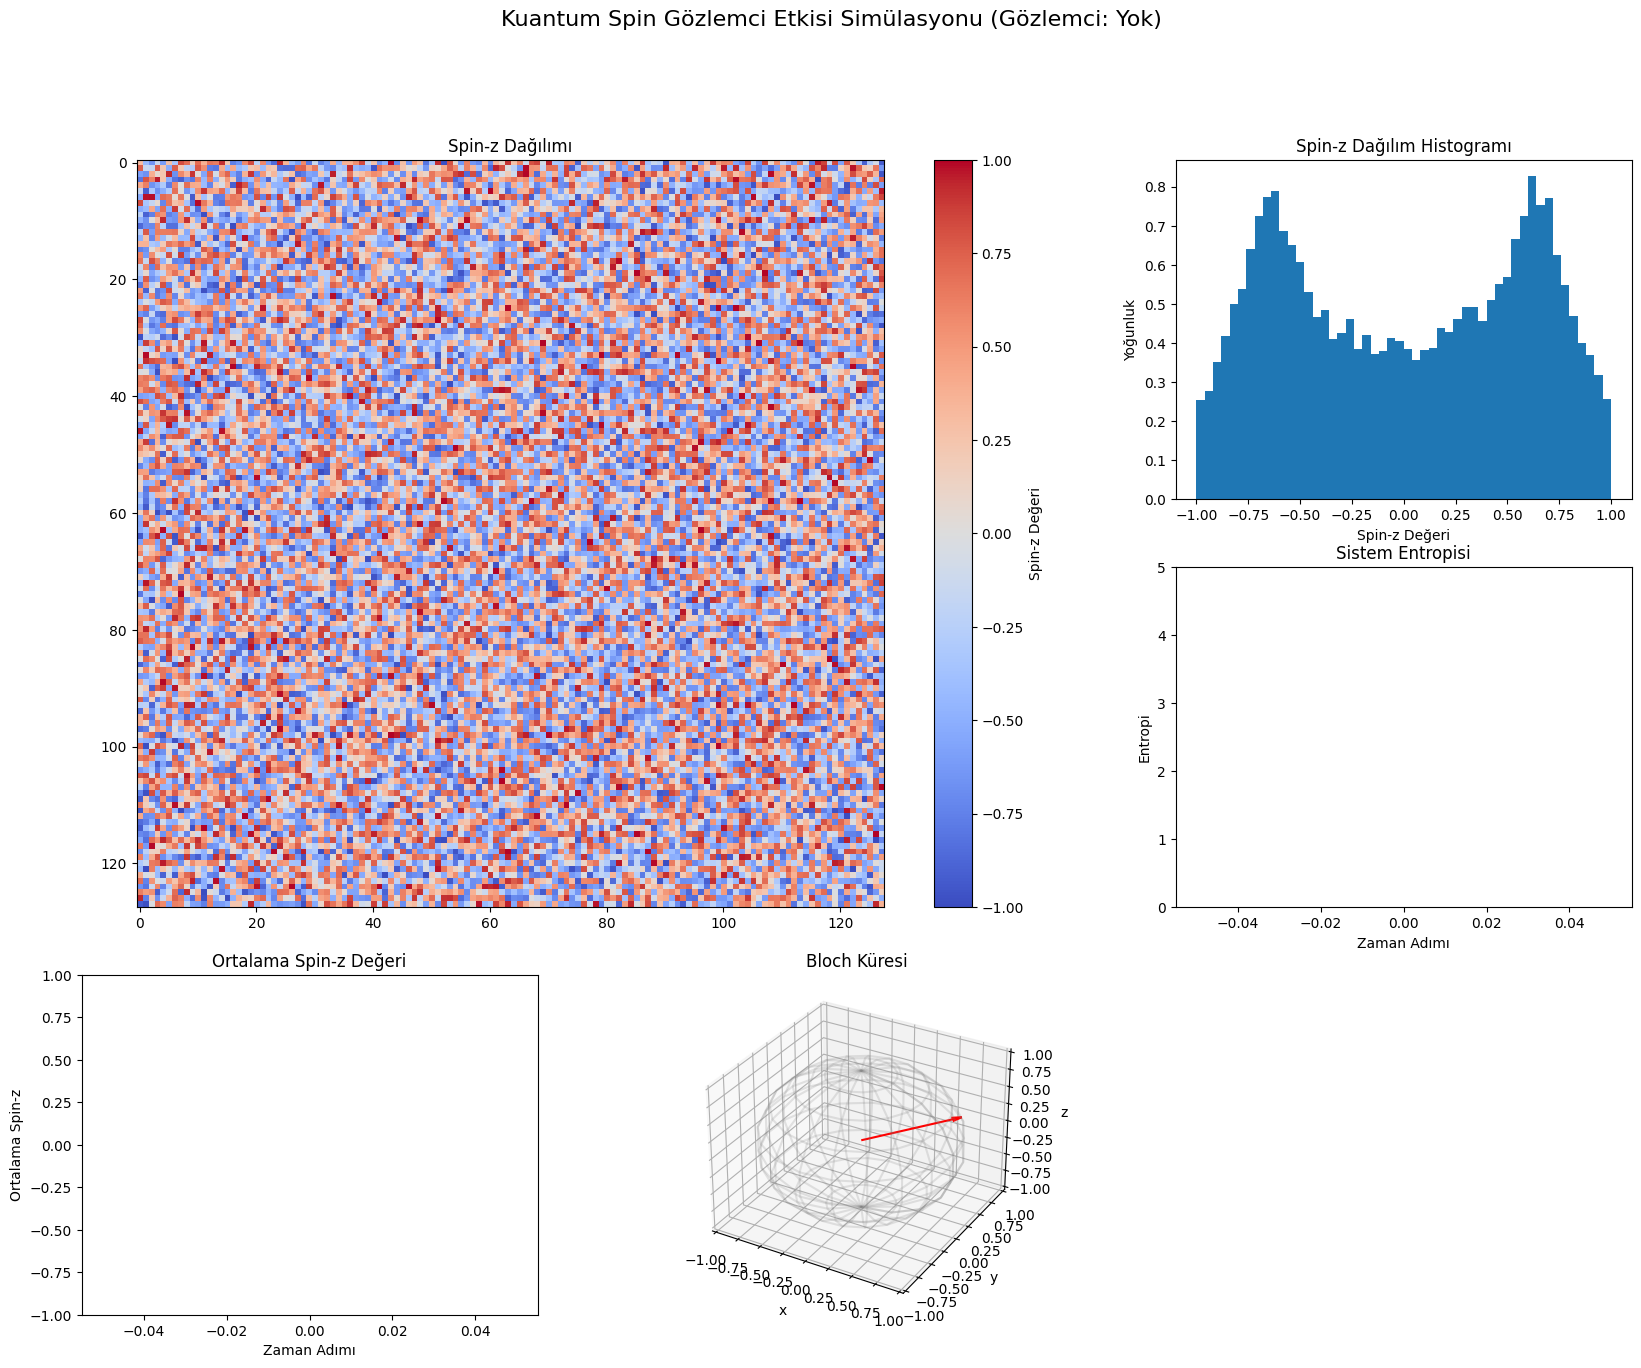

In [ ]:

import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.gridspec as gridspec

# PyTorch cihaz seçimi (GPU varsa kullan)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class QuantumSpinSystem:
    def __init__(self, size, B):
        self.size = size
        self.B = B
        self.spins = torch.rand(size, size, 3, device=device) * 2 - 1
        self.spins = self.spins / torch.norm(self.spins, dim=2, keepdim=True)

    def update(self, dt, g):
        if g:  # Gözlemci varsa
            # Spin'i ölç ve kuantize et
            self.spins[:,:,2] = torch.sign(self.spins[:,:,2])
            self.spins[:,:,0] = 0
            self.spins[:,:,1] = 0
        else:  # Gözlemci yoksa
            # Presesyon
            rotation = torch.tensor([
                [torch.cos(self.B * dt), -torch.sin(self.B * dt), 0],
                [torch.sin(self.B * dt), torch.cos(self.B * dt), 0],
                [0, 0, 1]
            ], device=device)
            self.spins = torch.matmul(self.spins, rotation.T)

            # Kuantum dalgalanmalar
            noise = torch.randn_like(self.spins) * 0.1
            self.spins += noise
            self.spins = self.spins / torch.norm(self.spins, dim=2, keepdim=True)

    def get_spin_z(self):
        return self.spins[:,:,2].cpu().numpy()

def calculate_entropy(spins):
    hist, _ = np.histogram(spins, bins=20, density=True)
    hist = hist[hist > 0]  # log(0) hatası almamak için
    return -np.sum(hist * np.log2(hist))

# Parametre ayarları
SIZE = 128
B = 1.0  # Manyetik alan şiddeti
dt = 0.01  # Zaman adımı

# Gözlemci değişkeni
g = bool(np.random.choice([0, 1]))

# Kuantum spin sistemini oluştur
system = QuantumSpinSystem(SIZE, B)

# Görselleştirme ayarları
fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(3, 3, figure=fig)
ax_spin = fig.add_subplot(gs[0:2, 0:2])
ax_hist = fig.add_subplot(gs[0, 2])
ax_entropy = fig.add_subplot(gs[1, 2])
ax_avg_spin = fig.add_subplot(gs[2, 0])
ax_bloch = fig.add_subplot(gs[2, 1], projection='3d')
ax_info = fig.add_subplot(gs[2, 2])

fig.suptitle(f"Kuantum Spin Gözlemci Etkisi Simülasyonu (Gözlemci: {'Var' if g else 'Yok'})", fontsize=16)

# Spin matrisi görselleştirmesi
im = ax_spin.imshow(system.get_spin_z(), cmap='coolwarm', animated=True, vmin=-1, vmax=1)
ax_spin.set_title('Spin-z Dağılımı')
plt.colorbar(im, ax=ax_spin, label='Spin-z Değeri')

# Histogram
hist_data, hist_bins, _ = ax_hist.hist(system.get_spin_z().flatten(), bins=50, density=True)
ax_hist.set_title('Spin-z Dağılım Histogramı')
ax_hist.set_xlabel('Spin-z Değeri')
ax_hist.set_ylabel('Yoğunluk')

# Entropi grafiği
entropy_values = [calculate_entropy(system.get_spin_z())]
entropy_line, = ax_entropy.plot(entropy_values)
ax_entropy.set_title('Sistem Entropisi')
ax_entropy.set_xlabel('Zaman Adımı')
ax_entropy.set_ylabel('Entropi')
ax_entropy.set_ylim(0, 5)

# Ortalama spin-z grafiği
avg_spin_values = [np.mean(system.get_spin_z())]
avg_spin_line, = ax_avg_spin.plot(avg_spin_values)
ax_avg_spin.set_title('Ortalama Spin-z Değeri')
ax_avg_spin.set_xlabel('Zaman Adımı')
ax_avg_spin.set_ylabel('Ortalama Spin-z')
ax_avg_spin.set_ylim(-1, 1)

# Bloch küresi
def plot_bloch_sphere(ax, spins):
    ax.clear()
    ax.set_title("Bloch Küresi")
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.plot_wireframe(x, y, z, color="gray", alpha=0.2)
    ax.quiver(0, 0, 0, spins[0], spins[1], spins[2], color="r", arrow_length_ratio=0.1)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

plot_bloch_sphere(ax_bloch, system.spins[0,0].cpu().numpy())

# Bilgi kutusu
info_text = ax_info.text(0.05, 0.95, '', transform=ax_info.transAxes, verticalalignment='top', fontsize=10)
ax_info.axis('off')

# Animasyon fonksiyonu
def update(frame):
    system.update(dt, g)
    spin_data = system.get_spin_z()

    # Spin matrisi güncellemesi
    im.set_array(spin_data)

    # Histogram güncellemesi
    ax_hist.clear()
    ax_hist.hist(spin_data.flatten(), bins=50, density=True)
    ax_hist.set_title('Spin-z Dağılım Histogramı')
    ax_hist.set_xlabel('Spin-z Değeri')
    ax_hist.set_ylabel('Yoğunluk')

    # Entropi güncellemesi
    entropy_values.append(calculate_entropy(spin_data))
    entropy_line.set_data(range(len(entropy_values)), entropy_values)
    ax_entropy.set_xlim(0, len(entropy_values))

    # Ortalama spin-z güncellemesi
    avg_spin_values.append(np.mean(spin_data))
    avg_spin_line.set_data(range(len(avg_spin_values)), avg_spin_values)
    ax_avg_spin.set_xlim(0, len(avg_spin_values))

    # Bloch küresi güncellemesi
    plot_bloch_sphere(ax_bloch, system.spins[0,0].cpu().numpy())

    # Bilgi kutusu güncellemesi
    info_text.set_text(f"Zaman: {frame*dt:.2f} s\n"
                       f"Gözlemci: {'Var' if g else 'Yok'}\n"
                       f"Ortalama Spin-z: {avg_spin_values[-1]:.4f}\n"
                       f"Entropi: {entropy_values[-1]:.4f}")

    fig.suptitle(f"Kuantum Spin Gözlemci Etkisi Simülasyonu (Gözlemci: {'Var' if g else 'Yok'}, t = {frame*dt:.2f} s)", fontsize=16)

    return im, entropy_line, avg_spin_line, ax_hist, ax_bloch, info_text

# Animasyonu oluştur ve kaydet
anim = FuncAnimation(fig, update, frames=64, interval=64, blit=False)
anim.save('quantum_observer_effect_optimized.gif', writer='pillow', fps=25)

plt.close()

print(f"Gözlemci {'var' if g else 'yok'}.")
print("Animasyon 'quantum_observer_effect_optimized.gif' olarak kaydedildi.")

In [ ]:

import sys
sys.setrecursionlimit(10000)  # Özyineleme limitini artır

import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.gridspec as gridspec
import os

# PyTorch cihaz seçimi (GPU varsa kullan)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class QuantumSpinSystem:
    def __init__(self, size, B):
        self.size = size
        self.B = B
        self.spins = torch.rand(size, size, 3, device=device) * 2 - 1
        self.spins = self.spins / torch.norm(self.spins, dim=2, keepdim=True)

    def update(self, dt, g):
        if g:  # Gözlemci varsa
            self.spins[:,:,2] = torch.sign(self.spins[:,:,2])
            self.spins[:,:,0] = 0
            self.spins[:,:,1] = 0
        else:  # Gözlemci yoksa
            rotation = torch.tensor([
                [torch.cos(self.B * dt), -torch.sin(self.B * dt), 0],
                [torch.sin(self.B * dt), torch.cos(self.B * dt), 0],
                [0, 0, 1]
            ], device=device)
            self.spins = torch.matmul(self.spins, rotation.T)
            noise = torch.randn_like(self.spins) * 0.1
            self.spins += noise
            self.spins = self.spins / torch.norm(self.spins, dim=2, keepdim=True)

    def get_spin_z(self):
        return self.spins[:,:,2].cpu().numpy()

def calculate_entropy(spins):
    hist, _ = np.histogram(spins, bins=20, density=True)
    hist = hist[hist > 0]
    return -np.sum(hist * np.log2(hist))

# Parametre ayarları
B = 1.0  # Manyetik alan şiddeti
dt = 0.01  # Zaman adımı

# Gözlemci değişkeni
g = bool(np.random.choice([0, 1]))

# Matris boyutunu ayarla
SIZE = 512 if g else 8  # Bellek kullanımını azaltmak için 1024 yerine 512

# Kuantum spin sistemini oluştur
system = QuantumSpinSystem(SIZE, B)

# Görselleştirme ayarları
fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(3, 3, figure=fig)
ax_spin = fig.add_subplot(gs[0:2, 0:2])
ax_hist = fig.add_subplot(gs[0, 2])
ax_entropy = fig.add_subplot(gs[1, 2])
ax_avg_spin = fig.add_subplot(gs[2, 0])
ax_bloch = fig.add_subplot(gs[2, 1], projection='3d')
ax_info = fig.add_subplot(gs[2, 2])

fig.suptitle(f"Kuantum Spin Gözlemci Etkisi Simülasyonu (Gözlemci: {'Var' if g else 'Yok'})", fontsize=16)

# Spin matrisi görselleştirmesi
im = ax_spin.imshow(system.get_spin_z(), cmap='coolwarm', animated=True, vmin=-1, vmax=1)
ax_spin.set_title('Spin-z Dağılımı')
plt.colorbar(im, ax=ax_spin, label='Spin-z Değeri')

# Histogram
hist_data, hist_bins, _ = ax_hist.hist(system.get_spin_z().flatten(), bins=50, density=True)
ax_hist.set_title('Spin-z Dağılım Histogramı')
ax_hist.set_xlabel('Spin-z Değeri')
ax_hist.set_ylabel('Yoğunluk')

# Entropi grafiği
entropy_values = [calculate_entropy(system.get_spin_z())]
entropy_line, = ax_entropy.plot(entropy_values)
ax_entropy.set_title('Sistem Entropisi')
ax_entropy.set_xlabel('Zaman Adımı')
ax_entropy.set_ylabel('Entropi')
ax_entropy.set_ylim(0, 5)

# Ortalama spin-z grafiği
avg_spin_values = [np.mean(system.get_spin_z())]
avg_spin_line, = ax_avg_spin.plot(avg_spin_values)
ax_avg_spin.set_title('Ortalama Spin-z Değeri')
ax_avg_spin.set_xlabel('Zaman Adımı')
ax_avg_spin.set_ylabel('Ortalama Spin-z')
ax_avg_spin.set_ylim(-1, 1)

# Bloch küresi
def plot_bloch_sphere(ax, spins):
    ax.clear()
    ax.set_title("Bloch Küresi")
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.plot_wireframe(x, y, z, color="gray", alpha=0.2)
    ax.quiver(0, 0, 0, spins[0], spins[1], spins[2], color="r", arrow_length_ratio=0.1)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

plot_bloch_sphere(ax_bloch, system.spins[0,0].cpu().numpy())

# Bilgi kutusu
info_text = ax_info.text(0.05, 0.95, '', transform=ax_info.transAxes, verticalalignment='top', fontsize=10)
ax_info.axis('off')

# Dosya boyutu ve bit sayısı için değişkenler
file_size = 0
bit_count = 0

# Animasyon fonksiyonu
def update(frame):
    global file_size, bit_count
    system.update(dt, g)
    spin_data = system.get_spin_z()

    im.set_array(spin_data)

    ax_hist.clear()
    ax_hist.hist(spin_data.flatten(), bins=50, density=True)
    ax_hist.set_title('Spin-z Dağılım Histogramı')
    ax_hist.set_xlabel('Spin-z Değeri')
    ax_hist.set_ylabel('Yoğunluk')

    entropy_values.append(calculate_entropy(spin_data))
    entropy_line.set_data(range(len(entropy_values)), entropy_values)
    ax_entropy.set_xlim(0, len(entropy_values))

    avg_spin_values.append(np.mean(spin_data))
    avg_spin_line.set_data(range(len(avg_spin_values)), avg_spin_values)
    ax_avg_spin.set_xlim(0, len(avg_spin_values))

    plot_bloch_sphere(ax_bloch, system.spins[0,0].cpu().numpy())

    # Dosya boyutunu hesapla (sadece son karede)
    if frame == 60:  # Son kare
        anim.save('temp.gif', writer='pillow')
        file_size = os.path.getsize('temp.gif')
        bit_count = file_size * 8
        os.remove('temp.gif')

    info_text.set_text(f"Zaman: {frame*dt:.2f} s\n"
                       f"Gözlemci: {'Var' if g else 'Yok'}\n"
                       f"Ortalama Spin-z: {avg_spin_values[-1]:.4f}\n"
                       f"Entropi: {entropy_values[-1]:.4f}\n"
                       f"Dosya Boyutu: {file_size/1024:.2f} KB\n"
                       f"Bit Sayısı: {bit_count}")

    ax_spin.set_title(f'Spin-z Dağılımı\nBit Sayısı: {bit_count}')

    fig.suptitle(f"Kuantum Spin Gözlemci Etkisi Simülasyonu\n(Gözlemci: {'Var' if g else 'Yok'}, t = {frame*dt:.2f} s, Matris: {SIZE}x{SIZE})", fontsize=16)

    return im, entropy_line, avg_spin_line, ax_hist, ax_bloch, info_text, ax_spin

# Animasyonu oluştur ve kaydet
try:
    anim = FuncAnimation(fig, update, frames=32, interval=64, blit=False)
    anim.save('quantum_observer_effect_optimized.gif', writer='pillow', fps=25)
except Exception as e:
    print(f"Bir hata oluştu: {e}")
    import traceback
    traceback.print_exc()
finally:
    plt.close()

print(f"Gözlemci {'var' if g else 'yok'}.")
print(f"Matris boyutu: {SIZE}x{SIZE}")
print("Animasyon 'Qquantum_observer_effect_optimized.gif' olarak kaydedildi.")
print(f"Son dosya boyutu: {file_size/1024:.2f} KB")
print(f"Toplam bit sayısı: {bit_count}")

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import scipy.constants as const
from scipy.special import hermite
from scipy.stats import norm
import os

class QuantumAtom:
    def __init__(self, ecount):
        self.ecount = ecount
        self.n = 1  # Başlangıç kuantum sayısı
        self.l = 0  # Açısal momentum kuantum sayısı
        self.m = 0  # Manyetik kuantum sayısı
        self.a0 = const.physical_constants['Bohr radius'][0]
        self.grid_size = 100
        self.x = np.linspace(-10*self.a0, 10*self.a0, self.grid_size)
        self.y = np.linspace(-10*self.a0, 10*self.a0, self.grid_size)
        self.X, self.Y = np.meshgrid(self.x, self.y)
        self.R = np.sqrt(self.X**2 + self.Y**2)
        self.Theta = np.arctan2(self.Y, self.X)

    def wavefunction(self, t):
        r = self.R / self.a0
        theta = self.Theta
        phi = 0  # Açısal bağımlılığı basitleştirmek için

        # Radyal kısım
        L = hermite(self.n - self.l - 1)
        R = np.exp(-r/2) * r**self.l * L(r)

        # Açısal kısım
        Y = np.sin(theta)**abs(self.m) * np.cos(phi*self.m)

        # Zaman bağımlılığı
        E = -13.6 / self.n**2  # Enerji (eV)
        omega = E / const.hbar
        T = np.exp(-1j * omega * t)

        return R * Y * T

    def probability_density(self, t):
        psi = self.wavefunction(t)
        return np.abs(psi)**2

    def particle_position(self, t):
        prob = self.probability_density(t)
        prob_flat = prob.flatten()
        idx = np.random.choice(len(prob_flat), p=prob_flat/np.sum(prob_flat))
        return np.unravel_index(idx, prob.shape)

# Simülasyon parametreleri
ecount = 1  # Elektron sayısı
sim_time = 1.0  # Simülasyon süresi (saniye)
fps = 30  # Saniyedeki kare sayısı

atom = QuantumAtom(ecount)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle(f"Kuantum Atom Simülasyonu (Elektron Sayısı: {ecount})", fontsize=16)

# Dalga fonksiyonu görselleştirmesi
im1 = ax1.imshow(np.zeros((atom.grid_size, atom.grid_size)), cmap='viridis', animated=True)
ax1.set_title("Dalga Fonksiyonu Olasılık Yoğunluğu")
plt.colorbar(im1, ax=ax1, label='Olasılık Yoğunluğu')

# Parçacık görselleştirmesi
particle, = ax2.plot([], [], 'ro', markersize=5)
ax2.set_xlim(0, atom.grid_size)
ax2.set_ylim(0, atom.grid_size)
ax2.set_title("Parçacık Konumu")

# Bilgi metni
info_text = ax2.text(0.02, 0.98, '', transform=ax2.transAxes, verticalalignment='top', fontsize=10)

# Dosya boyutu ve bit sayısı için değişkenler
file_size = 0
bit_count = 0

def update(frame):
    global file_size, bit_count
    t = frame / fps

    # Dalga fonksiyonu güncellemesi
    prob = atom.probability_density(t)
    im1.set_array(prob)

    # Parçacık konumu güncellemesi
    x, y = atom.particle_position(t)
    particle.set_data(x, y)

    # Bilgi metni güncellemesi
    info_text.set_text(f"Zaman: {t:.2f} s\n"
                       f"Enerji: {-13.6 / atom.n**2:.2f} eV\n"
                       f"Kuantum Sayıları: n={atom.n}, l={atom.l}, m={atom.m}")

    # Dosya boyutu hesaplaması (son karede)
    if frame == fps - 1:
        plt.savefig('temp.png')
        file_size = os.path.getsize('temp.png')
        bit_count = file_size * 8
        os.remove('temp.png')

    return im1, particle, info_text

# Animasyonu oluştur ve kaydet
anim = FuncAnimation(fig, update, frames=fps, interval=1000/fps, blit=True)
anim.save('quantum_atom_simulation.gif', writer='pillow', fps=fps)

plt.close()

print(f"Elektron sayısı: {ecount}")
print(f"Simülasyon süresi: {sim_time} saniye")
print("Animasyon 'quantum_atom_simulation.gif' olarak kaydedildi.")
print(f"Dosya boyutu: {file_size/1024:.2f} KB")
print(f"Toplam bit sayısı: {bit_count}")

# Teorik hesaplamalar
bohr_radius = const.physical_constants['Bohr radius'][0]
ground_state_energy = -13.6  # eV
print(f"\nTeorik Hesaplamalar:")
print(f"Bohr Yarıçapı: {bohr_radius:.2e} m")
print(f"Temel Durum Enerjisi: {ground_state_energy} eV")

<ipython-input-5-55ffb908aa19>:90: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  particle.set_data(x, y)
<ipython-input-5-55ffb908aa19>:90: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  particle.set_data(x, y)


Elektron sayısı: 1
Simülasyon süresi: 1.0 saniye
Animasyon 'quantum_atom_simulation.gif' olarak kaydedildi.
Dosya boyutu: 64.61 KB
Toplam bit sayısı: 529264

Teorik Hesaplamalar:
Bohr Yarıçapı: 5.29e-11 m
Temel Durum Enerjisi: -13.6 eV


In [ ]:
!pip install qutip
!pip install qutip_qip
!pip install --upgrade qutip_qip

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import qutip as qt
import warnings
import sys
import multiprocessing as mp
from functools import partial
from typing import List, Tuple, Optional
import logging

# Logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

def check_and_import() -> bool:
    """
    Check for the existence and version of QuTiP and qutip_qip packages.

    Returns:
        bool: True if qutip_qip package is installed, False otherwise.
    """
    logger.info(f"QuTiP version: {qt.__version__}")

    try:
        import qutip_qip
        logger.info(f"qutip_qip version: {qutip_qip.__version__}")
        return True
    except ImportError:
        logger.warning("qutip_qip package not found. Alternative methods will be used.")
        return False

use_qutip_qip = check_and_import()

class QuantumTeleportation:
    def __init__(self):
        self.alice_qubit = qt.rand_ket(2)
        self.bell_pair = qt.bell_state('00')
        self.teleportation_count = 0
        self.success_rates: List[float] = []

    def create_circuit(self) -> qt.QubitCircuit:
        """
        Create a quantum circuit for teleportation.

        Returns:
            qt.QubitCircuit: The quantum circuit created.
        """
        if use_qutip_qip:
            from qutip_qip.circuit import QubitCircuit
            from qutip_qip.operations import CNOT, SNOT
            circuit = QubitCircuit(3)
            circuit.add_gate(SNOT(1))
            circuit.add_gate(CNOT(1, 2))
            circuit.add_gate(CNOT(0, 1))
            circuit.add_gate(SNOT(0))
        else:
            circuit = qt.QubitCircuit(3)
            circuit.add_gate(qt.gates.snot(1))
            circuit.add_gate(qt.gates.cnot(1, 2))
            circuit.add_gate(qt.gates.cnot(0, 1))
            circuit.add_gate(qt.gates.snot(0))
        return circuit

    def teleport(self) -> qt.Qobj:
        """
        Perform quantum teleportation.

        Returns:
            qt.Qobj: The teleported qubit.
        """
        full_state = qt.tensor(self.alice_qubit, self.bell_pair)
        circuit = self.create_circuit()

        try:
            if use_qutip_qip:
                from qutip_qip.device import LinearSpinChain
                device = LinearSpinChain(3)
                result = device.run(circuit)
                final_state = result[-1] if isinstance(result, list) else result.states[-1]
            else:
                final_state = circuit.run(full_state)
        except Exception as e:
            logger.error(f"Error during teleportation: {e}")
            raise

        meas_result = qt.measure_observable(final_state, qt.sigmaz(), [0, 1])
        outcome = int(meas_result[0] + 2 * meas_result[1])
        corrections = [qt.qeye(2), qt.sigmax(), qt.sigmaz(), qt.sigmax() * qt.sigmaz()]
        bob_qubit = corrections[outcome] * final_state.ptrace(2) * corrections[outcome].dag()

        self.teleportation_count += 1
        success = self.calculate_fidelity(bob_qubit, self.alice_qubit)
        self.success_rates.append(success)

        return bob_qubit.unit()

    @staticmethod
    def calculate_fidelity(state1: qt.Qobj, state2: qt.Qobj) -> float:
        """
        Calculate fidelity between two quantum states.

        Args:
            state1 (qt.Qobj): First quantum state.
            state2 (qt.Qobj): Second quantum state.

        Returns:
            float: The fidelity value.
        """
        return qt.fidelity(state1, state2)

    def get_state_matrix(self) -> np.ndarray:
        """
        Get the density matrix of the teleported qubit.

        Returns:
            np.ndarray: The density matrix.
        """
        result = self.teleport()
        return qt.ket2dm(result).full()

    def get_average_success_rate(self) -> float:
        """
        Calculate the average success rate.

        Returns:
            float: The average success rate.
        """
        return np.mean(self.success_rates) if self.success_rates else 0.0

def setup_plot() -> Tuple[plt.Figure, List[plt.Axes]]:
    """
    Set up the plot interface.

    Returns:
        Tuple[plt.Figure, List[plt.Axes]]: Figure and axes objects.
    """
    fig, axes = plt.subplots(3, 2, figsize=(15, 20))
    fig.suptitle("Advanced Quantum Teleportation Simulation and Analysis", fontsize=16)
    return fig, axes.flatten()

def init_plot(quantum_teleporter: QuantumTeleportation, axes: List[plt.Axes]) -> Tuple:
    """
    Initialize plot elements.

    Args:
        quantum_teleporter (QuantumTeleportation): The quantum teleportation instance.
        axes (List[plt.Axes]): List of plot axes.

    Returns:
        Tuple: Initialized plot elements.
    """
    ax_matrix, ax_bloch, ax_success, ax_fidelity, ax_entropy, ax_info = axes

    im = ax_matrix.imshow(np.zeros((2, 2)), cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
    ax_matrix.set_title("Quantum State Matrix")

    b = qt.Bloch(axes=ax_bloch)

    success_line, = ax_success.plot([], [])
    ax_success.set_title("Teleportation Success Rate")
    ax_success.set_ylim(0, 1)

    fidelity_line, = ax_fidelity.plot([], [])
    ax_fidelity.set_title("Quantum State Fidelity")
    ax_fidelity.set_ylim(0, 1)

    entropy_line, = ax_entropy.plot([], [])
    ax_entropy.set_title("von Neumann Entropy")
    ax_entropy.set_ylim(0, 1)

    info_text = ax_info.text(0.02, 0.5, '', transform=ax_info.transAxes, verticalalignment='center', fontsize=10)
    ax_info.axis('off')

    return im, b, success_line, fidelity_line, entropy_line, info_text

def update(frame: int, quantum_teleporter: QuantumTeleportation, im, b, success_line, fidelity_line, entropy_line, info_text, axes: List[plt.Axes]) -> List:
    """
    Update the animation for each frame.

    Args:
        frame (int): Frame number.
        quantum_teleporter (QuantumTeleportation): The quantum teleportation instance.
        im, b, success_line, fidelity_line, entropy_line, info_text: Plot elements.
        axes (List[plt.Axes]): List of plot axes.

    Returns:
        List: Updated plot elements.
    """
    try:
        t = frame / 30  # Assuming fps = 30
        matrix = quantum_teleporter.get_state_matrix()
        im.set_array(matrix)

        b.clear()
        teleported_state = quantum_teleporter.teleport()
        if isinstance(teleported_state, qt.Qobj) and teleported_state.type == 'ket' and teleported_state.shape == (2, 1):
            b.add_states(teleported_state)
            b.render(axes[1])

        success_rate = quantum_teleporter.get_average_success_rate()
        success_line.set_data(range(frame + 1), quantum_teleporter.success_rates)
        axes[2].set_xlim(0, frame + 1)

        fidelity = quantum_teleporter.calculate_fidelity(teleported_state, quantum_teleporter.alice_qubit)
        fidelity_line.set_data(range(frame + 1), quantum_teleporter.success_rates)
        axes[3].set_xlim(0, frame + 1)

        entropy = qt.entropy_vn(qt.ket2dm(teleported_state))
        entropy_line.set_data(range(frame + 1), [entropy] * (frame + 1))
        axes[4].set_xlim(0, frame + 1)

        info_text.set_text(f"Time: {t:.2f} s\n"
                           f"Avg. Success Rate: {success_rate:.4f}\n"
                           f"Total Teleportations: {quantum_teleporter.teleportation_count}\n"
                           f"Last Fidelity: {fidelity:.4f}\n"
                           f"Last Entropy: {entropy:.4f}")

        return [im, b.render(), success_line, fidelity_line, entropy_line, info_text]

    except Exception as e:
        logger.error(f"Error during update: {e}")
        raise

# Assuming you would have code to start the animation elsewhere

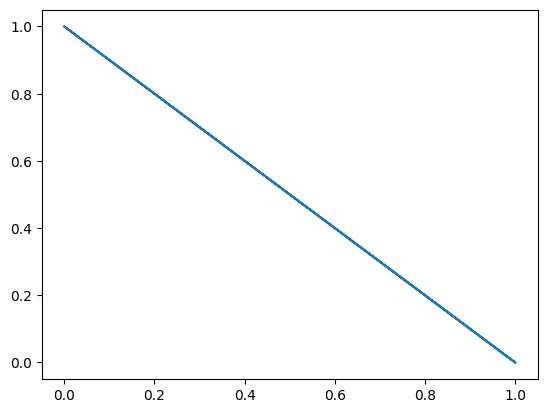

In [ ]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
ax.plot([1, 0, 1, 0], [0, 1, 0, 1])  # Plot some data on the Axes.
plt.show()                           # Show the figure.

[[[array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
          0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
          0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
          0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
          0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
          0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
          0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
          0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
          0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
          0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])]]]

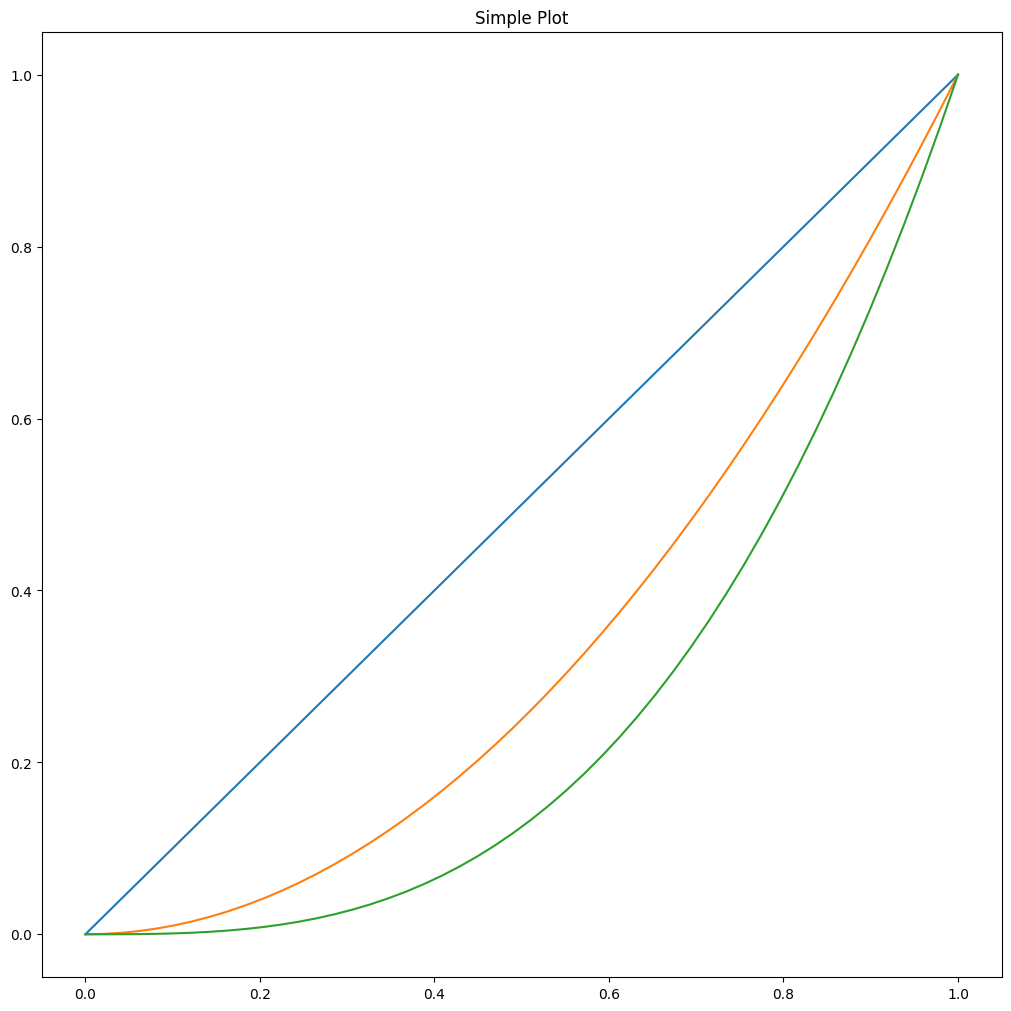

In [ ]:
x = (1,1)
x
x = np.linspace(0, 1,)  # Sample data.

plt.figure(figsize=(10, 10), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) Axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
cubic = np.matrix([1,1,1])
plt.title("Simple Plot")
np.matrix(x)
np.tensor = [[[x]]]
np.tensor

NameError: name 'my_plotter' is not defined

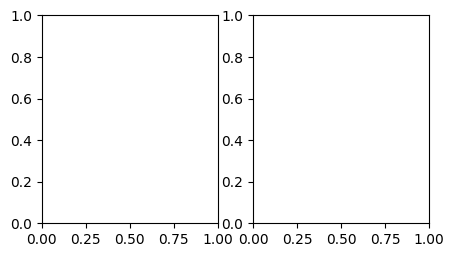

In [ ]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': "."})
my_plotter(ax2, data3, data4, {'marker': ","})

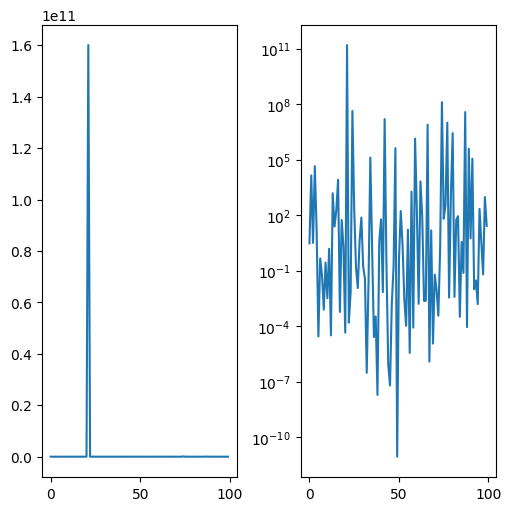

In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(5, 5), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10000**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data)

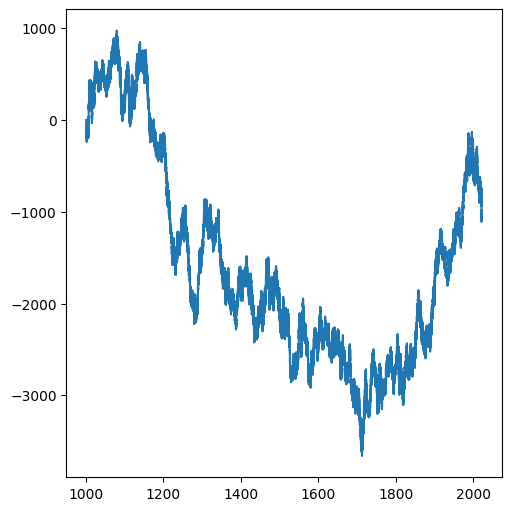

In [ ]:
from matplotlib.dates import ConciseDateFormatter

fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
dates = np.arange(np.datetime64('1000-10-10'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
ax.xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))

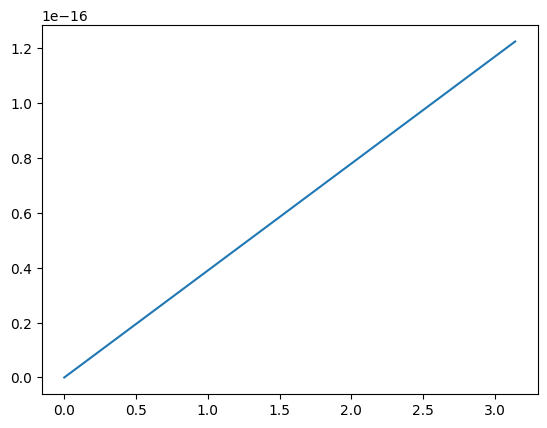

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1 * np.pi, 2)

fig, ax = plt.subplots()

# animated=True tells matplotlib to only draw the artist when we
# explicitly request it
(ln,) = ax.plot(x, np.sin(x), animated=True)

# make sure the window is raised, but the script keeps going
plt.show(block=False)

# stop to admire our empty window axes and ensure it is rendered at
# least once.
#
# We need to fully draw the figure at its final size on the screen
# before we continue on so that :
#  a) we have the correctly sized and drawn background to grab
#  b) we have a cached renderer so that ``ax.draw_artist`` works
# so we spin the event loop to let the backend process any pending operations
plt.pause(1)

# get copy of entire figure (everything inside fig.bbox) sans animated artist
bg = fig.canvas.copy_from_bbox(fig.bbox)
# draw the animated artist, this uses a cached renderer
ax.draw_artist(ln)
# show the result to the screen, this pushes the updated RGBA buffer from the
# renderer to the GUI framework so you can see it
fig.canvas.blit(fig.bbox)

for j in range(100):
    # reset the background back in the canvas state, screen unchanged
    fig.canvas.restore_region(bg)
    # update the artist, neither the canvas state nor the screen have changed
    ln.set_ydata(np.sin(x + (j / 1000) * np.pi))
    # re-render the artist, updating the canvas state, but not the screen
    ax.draw_artist(ln)
    # copy the image to the GUI state, but screen might not be changed yet
    fig.canvas.blit(fig.bbox)
    # flush any pending GUI events, re-painting the screen if needed
    fig.canvas.flush_events()
    # you can put a pause in if you want to slow things down
    # plt.pause(.1)

In [ ]:
In [1]: %matplotlib inline

In [ ]:
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

In [ ]:

img = np.asarray(Image.open('//content/spin_matrix_animation (2).gif'))
print(repr(img))
print(len(np.asarray(img)))
np.asarray = np.matris(np.asarray(img),np.asarray(img))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
1000


TypeError: 'list' object is not callable

In [ ]:
img = np.asarray(Image.open('//content/spin_matrix_animation (2).gif'))
print(repr(img))
print(len(np.asarray(img)))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
1000


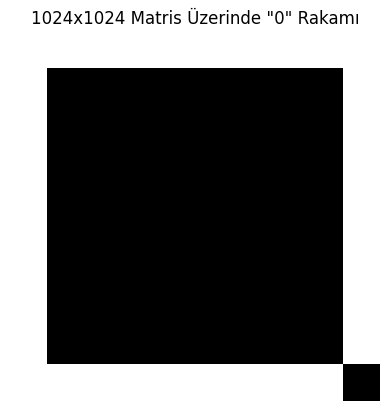

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def create_zero_matrix():
    # 10x10'luk bir matris oluştur
    matrix = np.ones((10, 10))

    # Kenarlardaki 1'leri 0 yaparak "0" rakamını oluştur
    matrix[0:9, 0] = 0  # Sol dikey kenar #Use integers to slice the array
    matrix[0:9, 9] = 0  # Sağ dikey kenar #Use integers to slice the array
    matrix[0, 0:9] = 0  # Üst yatay kenar #Use integers to slice the array
    matrix[9, 0:9] = 0  # Alt yatay kenar #Use integers to slice the array

    return matrix

def plot_matrix(matrix):
    plt.imshow(matrix, cmap='Greys', interpolation='nearest')
    plt.title('1024x1024 Matris Üzerinde "0" Rakamı')
    plt.axis('off')  # Eksenleri kapat
    plt.show()

# Matris oluştur ve çizdir
matrix = create_zero_matrix()
plot_matrix(matrix)

In [ ]:
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

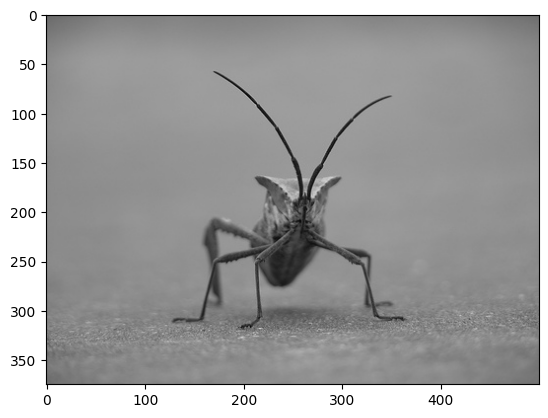

In [ ]:
img = Image.open('/content/stinkbug.png')
img.thumbnail((1024, 1024))  # resizes image in-place
imgplot = plt.imshow(img)

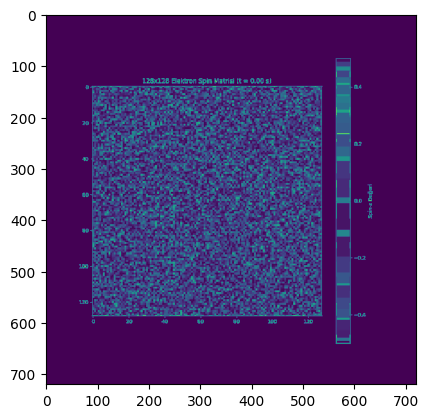

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('/content/spin_matrix_animation.gif')
img.thumbnail((720, 720))  # resizes image in-place

# Convert the image to a NumPy array
img_array = np.array(img)

# Display the entire image array since it is a grayscale image
plt.imshow(img_array)

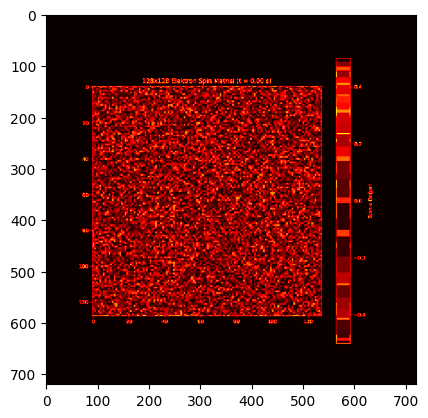

In [ ]:
plt.imshow(img_array, cmap="hot")

(array([2., 2., 3., 3., 2., 2., 4.]),
 array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 7 artists>)

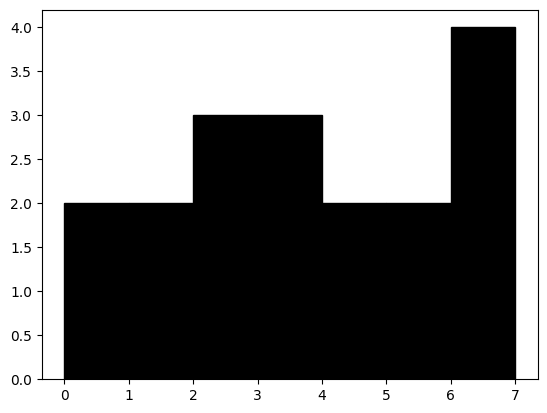

In [ ]:
plt.hist(lum_img.ravel(), bins=range(8), fc='k', ec='k')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

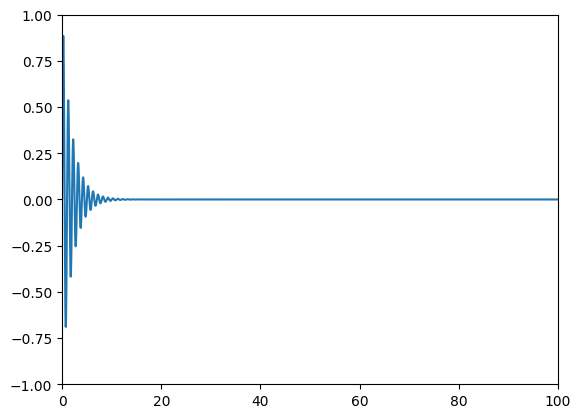

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.patches as mpatches

x = np.arange(0.001, 1000, 0.00005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim(0, 100)
ax.set_ylim(-1, 1)

plt.show()

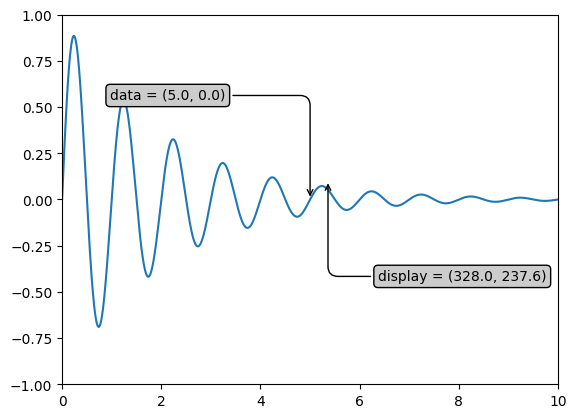

In [ ]:

x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

xdata, ydata = 5, 0
# This computing the transform now, if anything
# (figure size, dpi, axes placement, data limits, scales..)
# changes re-calling transform will get a different value.
xdisplay, ydisplay = ax.transData.transform((xdata, ydata))

bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=10")

offset = 72
ax.annotate(f'data = ({xdata:.1f}, {ydata:.1f})',
            (xdata, ydata), xytext=(-2*offset, offset), textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)

disp = ax.annotate(f'display = ({xdisplay:.1f}, {ydisplay:.1f})',
                   (xdisplay, ydisplay), xytext=(0.5*offset, -offset),
                   xycoords='figure pixels',
                   textcoords='offset points',
                   bbox=bbox, arrowprops=arrowprops)

plt.show()

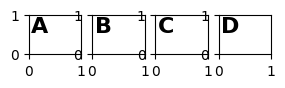

In [ ]:

fig = plt.figure()
for i, label in enumerate(('A', 'B', 'C', 'D')):
    ax = fig.add_subplot(8, 8, i+1)
    ax.text(0.05, 0.95, label, transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top')

plt.show()

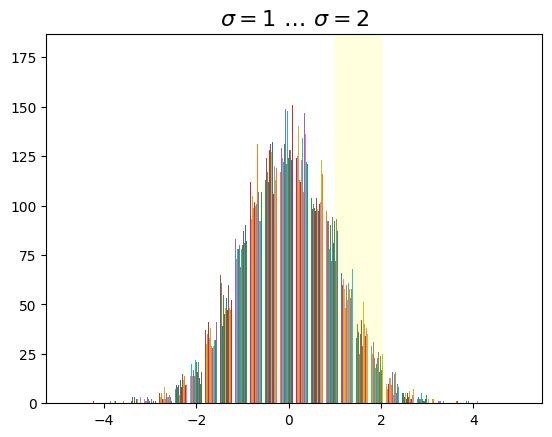

In [ ]:
import matplotlib.transforms as transforms

fig, ax = plt.subplots()
x = np.random.randn(1000,1000)

ax.hist(x, 30)
ax.set_title(r'$\sigma=1 \/ \dots \/ \sigma=2$', fontsize=16)

# the x coords of this transformation are data, and the y coord are axes
trans = transforms.blended_transform_factory(
    ax.transData, ax.transAxes)
# highlight the 1..2 stddev region with a span.
# We want x to be in data coordinates and y to span from 0..1 in axes coords.
rect = mpatches.Rectangle((1, 0), width=1, height=1, transform=trans,
                          color='yellow', alpha=0.128)
ax.add_patch(rect)

plt.show()

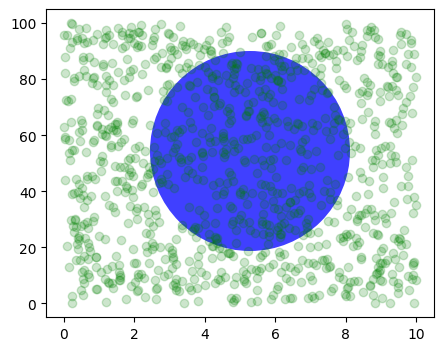

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
x, y = 10*np.random.rand(2, 1000)
ax.plot(x, y*10., 'go', alpha=0.2)  # plot some data in data coordinates
# add a circle in fixed-coordinates
circ = mpatches.Circle((2.5, 2), 1.0, transform=fig.dpi_scale_trans,
                       facecolor='blue', alpha=0.75)
ax.add_patch(circ)
plt.show()

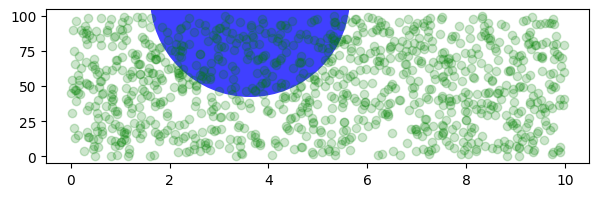

In [ ]:
fig, ax = plt.subplots(figsize=(7, 2))
x, y = 10*np.random.rand(2, 1000)
ax.plot(x, y*10., 'go', alpha=0.2)  # plot some data in data coordinates
# add a circle in fixed-coordinates
circ = mpatches.Circle((2.5, 2), 1.0, transform=fig.dpi_scale_trans,
                       facecolor='blue', alpha=0.75)
ax.add_patch(circ)
plt.show()

ValueError: x and y arrays must have a length of at least 3

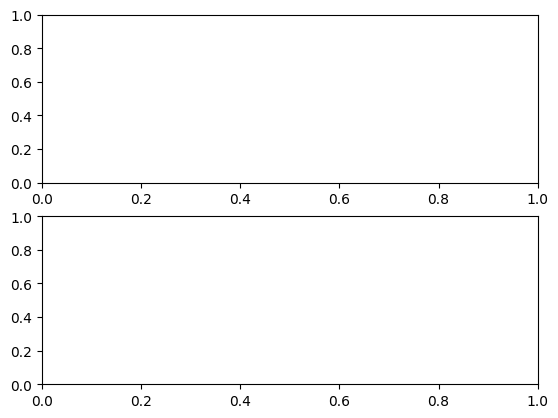

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.tri as tri

np.random.seed(19680801)
npts = 2
ngridx = 3
ngridy = 4
x = np.random.uniform(-1, 2, npts)
y = np.random.uniform(-1, 2, npts)
z = x * np.exp(-x**2 - y**2)

fig, (ax1, ax2) = plt.subplots(nrows=2)

# -----------------------
# Interpolation on a grid
# -----------------------
# A contour plot of irregularly spaced data coordinates
# via interpolation on a grid.

# Create grid values first.
xi = np.linspace(-2.1, 2.1, ngridx)
yi = np.linspace(-2.1, 2.1, ngridy)

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

# Note that scipy.interpolate provides means to interpolate data on a grid
# as well. The following would be an alternative to the four lines above:
# from scipy.interpolate import griddata
# zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')

ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x, y, 'ko', ms=3)
ax1.set(xlim=(-2, 2), ylim=(-2, 2))
ax1.set_title('grid and contour (%d points, %d grid points)' %
              (npts, ngridx * ngridy))

# ----------
# Tricontour
# ----------
# Directly supply the unordered, irregularly spaced coordinates
# to tricontour.

ax2.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
cntr2 = ax2.tricontourf(x, y, z, levels=14, cmap="RdBu_r")

fig.colorbar(cntr2, ax=ax2)
ax2.plot(x, y, 'ko', ms=3)
ax2.set(xlim=(-2, 2), ylim=(-2, 2))
ax2.set_title('tricontour (%d points)' % npts)

plt.subplots_adjust(hspace=0.5)
plt.show()

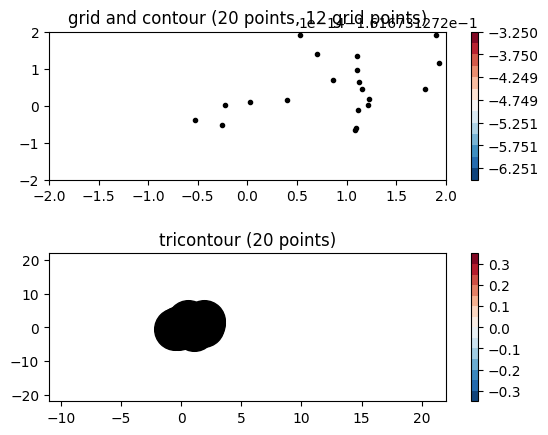

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.tri as tri

np.random.seed(19680801)
npts = 20 # Increased number of points
ngridx = 3
ngridy = 4
x = np.random.uniform(-1, 2, npts)
y = np.random.uniform(-1, 2, npts)
z = x * np.exp(-x**2 - y**2)

fig, (ax1, ax2) = plt.subplots(nrows=2)

# -----------------------
# Interpolation on a grid
# -----------------------
# A contour plot of irregularly spaced data coordinates
# via interpolation on a grid.

# Create grid values first.
xi = np.linspace(-2.1, 2.1, ngridx)
yi = np.linspace(-2.1, 2.1, ngridy)

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

# Note that scipy.interpolate provides means to interpolate data on a grid
# as well. The following would be an alternative to the four lines above:
# from scipy.interpolate import griddata
# zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')

ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x, y, 'ko', ms=3)
ax1.set(xlim=(-2, 2), ylim=(-2, 2))
ax1.set_title('grid and contour (%d points, %d grid points)' %
              (npts, ngridx * ngridy))

# ----------
# Tricontour
# ----------
# Directly supply the unordered, irregularly spaced coordinates
# to tricontour.

ax2.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
cntr2 = ax2.tricontourf(x, y, z, levels=14, cmap="RdBu_r")

fig.colorbar(cntr2, ax=ax2)
ax2.plot(x, y, 'ko', ms=30)
ax2.set(xlim=(-11, 22), ylim=(-22, 22))
ax2.set_title('tricontour (%d points)' % npts)

plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

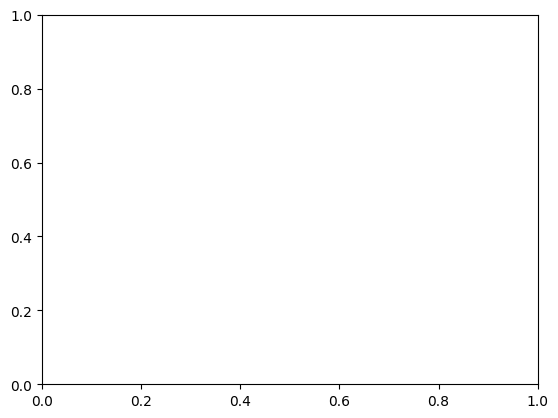

In [ ]:
fig, ax = plt.subplots()

<Figure size 640x480 with 0 Axes>

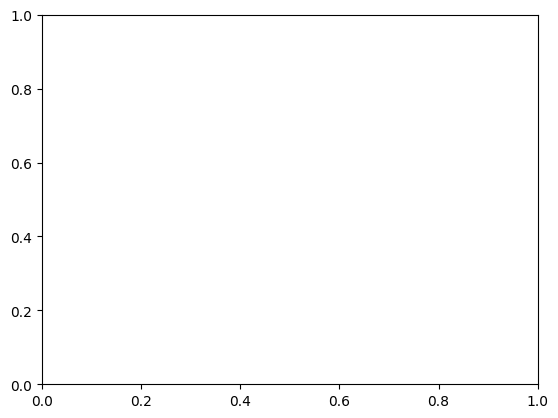

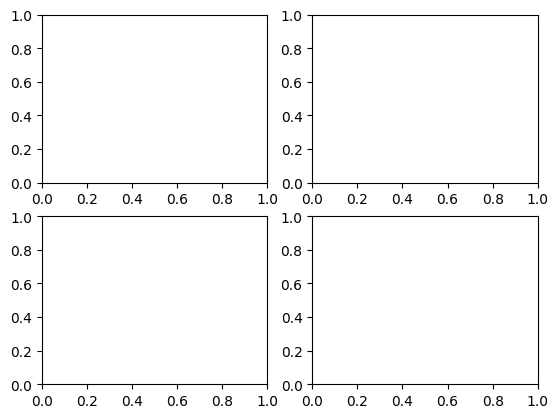

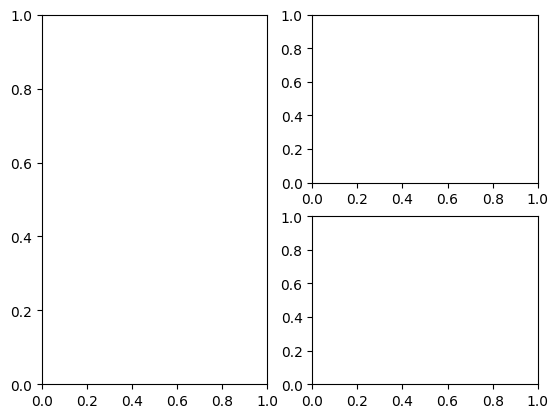

In [ ]:
fig = plt.figure()             # an empty figure with no Axes
fig, ax = plt.subplots()       # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
# a figure with one Axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])

Text(0.5, 1.0, 'scatter()')

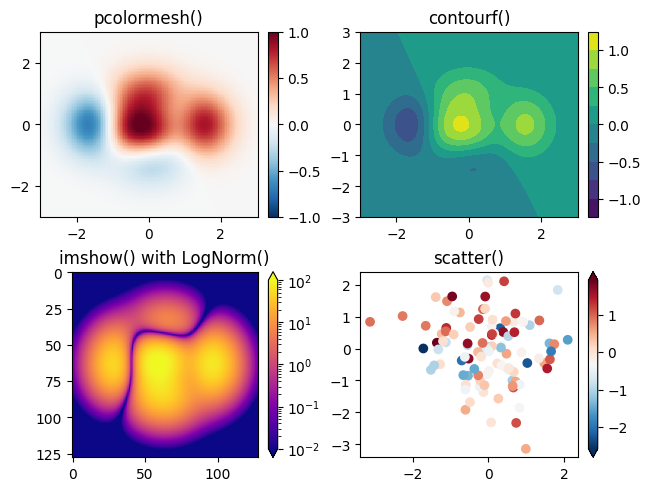

In [ ]:
from matplotlib.colors import LogNorm

X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma', norm=LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

In [ ]:
import numpy as np

In [ ]:
dt = np.dtype([('name', np.str_, 16), ('grades', np.float64, (2,))])
dt['name']
dt['grades']

dtype(('<f8', (2,)))

In [ ]:
x = np.array([('Sarah', (1, 0)), ('John', (0, 1))], dtype=dt)
x[1]
x[1]['grades']
type(x[1])
type(x[1]['grades'])
x

array([('Sarah', [1., 0.]), ('John', [0., 1.])],
      dtype=[('name', '<U16'), ('grades', '<f8', (2,))])

In [ ]:
!pip install numpy matplotlib qutip qutip-qip pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.0/130.0 kB 7.3 MB/s eta 0:00:00


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import qutip as qt
import warnings
import sys
import multiprocessing as mp
from functools import partial
from typing import List, Tuple, Optional
import logging
import time

# Gerekli kütüphanelerin yüklendiğinden emin olun
try:
    import qutip_qip
except ImportError:
    qutip_qip = None
    warnings.warn("qutip_qip paketi yüklü değil. Alternatif yöntemler kullanılacak.")

# Logging konfigürasyonu
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.StreamHandler(sys.stdout),
        logging.FileHandler("quantum_teleportation.log")
    ]
)
logger = logging.getLogger(__name__)

def check_versions() -> None:
    """
    Yüklü kütüphanelerin versiyonlarını kontrol eder ve loglar.
    """
    logger.info(f"QuTiP versiyonu: {qt.__version__}")
    if qutip_qip:
        logger.info(f"qutip_qip versiyonu: {qutip_qip.__version__}")
    else:
        logger.warning("qutip_qip paketi yüklü değil.")

check_versions()

class QuantumTeleportation:
    def __init__(self, max_retries: int = 3):
        self.alice_qubit = qt.rand_ket(2)
        self.bell_pair = qt.bell_state('00')
        self.teleportation_count = 0
        self.success_rates: List[float] = []
        self.max_retries = max_retries

    def create_circuit(self) -> Optional[qt.QubitCircuit]:
        """
        Kuantum devresi oluşturur. Eğer qutip_qip yüklüyse, onu kullanır; değilse alternatif bir yöntem dener.

        Returns:
            Optional[qt.QubitCircuit]: Oluşturulan kuantum devresi veya None
        """
        if qutip_qip:
            try:
                from qutip_qip.circuit import QubitCircuit
                from qutip_qip.operations import CNOT, SNOT
                circuit = QubitCircuit(3)
                circuit.add_gate(SNOT(1))
                circuit.add_gate(CNOT(1, 2))
                circuit.add_gate(CNOT(0, 1))
                circuit.add_gate(SNOT(0))
                logger.info("Kuantum devresi qutip_qip kullanılarak oluşturuldu.")
                return circuit
            except Exception as e:
                logger.error(f"qutip_qip ile devre oluşturulurken hata: {e}")
                return None
        else:
            try:
                # Alternatif yol: Qutip ile basit kuantum devresi
                circuit = qt.QubitCircuit(3)
                # Qutip-QIP olmadan gelişmiş devre eklemek zor olabilir. Basit bir devre ekleniyor.
                circuit.add_gate(qt.gates.SNOT, targets=[1])
                circuit.add_gate(qt.gates.CNOT, control=1, targets=2)
                circuit.add_gate(qt.gates.CNOT, control=0, targets=1)
                circuit.add_gate(qt.gates.SNOT, targets=[0])
                logger.info("Kuantum devresi qutip kullanılarak basit bir şekilde oluşturuldu.")
                return circuit
            except AttributeError as e:
                logger.error(f"Qutip kullanılarak devre oluşturulurken hata: {e}")
                return None

    def teleport(self) -> Optional[qt.Qobj]:
        """
        Kuantum ışınlama işlemini gerçekleştirir. Hata oluşursa, belirli sayıda tekrar denemesi yapar.

        Returns:
            Optional[qt.Qobj]: Işınlanmış kubit veya None
        """
        retries = 0
        while retries < self.max_retries:
            try:
                full_state = qt.tensor(self.alice_qubit, self.bell_pair)
                circuit = self.create_circuit()
                if not circuit:
                    raise ValueError("Kuantum devresi oluşturulamadı.")

                if qutip_qip:
                    from qutip_qip.device import LinearSpinChain
                    device = LinearSpinChain(3)
                    result = device.run(circuit, qt.tensor(full_state))
                    if isinstance(result, list):
                        final_state = result[-1]
                    elif hasattr(result, 'states'):
                        final_state = result.states[-1]
                    else:
                        raise ValueError(f"Beklenmeyen sonuç tipi: {type(result)}")
                else:
                    # Basit bir zaman evrimi simülasyonu kullanılıyor
                    final_state = circuit.run(full_state)

                # Ölçüm işlemi
                meas = final_state.ptrace(0).measure()
                outcome = int(meas)

                # Düzeltmeler
                corrections = [qt.qeye(2), qt.sigmax(), qt.sigmaz(), qt.sigmax()*qt.sigmaz()]
                bob_qubit = corrections[outcome] * final_state.ptrace(2) * corrections[outcome].dag()

                self.teleportation_count += 1
                fidelity = self.calculate_fidelity(bob_qubit, self.alice_qubit)
                self.success_rates.append(fidelity)

                logger.info(f"Işınlama başarılı. Fidelity: {fidelity:.4f}")
                return bob_qubit.unit()

            except Exception as e:
                retries += 1
                logger.error(f"Işınlama sırasında hata oluştu (deneme {retries}/{self.max_retries}): {e}")
                if retries >= self.max_retries:
                    logger.critical("Maksimum deneme sayısına ulaşıldı. Işınlama işlemi başarısız.")
                    return None
                time.sleep(1)  # Yeniden deneme öncesi bekleme

    @staticmethod
    def calculate_fidelity(state1: qt.Qobj, state2: qt.Qobj) -> float:
        """
        İki kuantum durum arasındaki sadakati (fidelity) hesaplar.

        Args:
            state1 (qt.Qobj): İlk kuantum durum
            state2 (qt.Qobj): İkinci kuantum durum

        Returns:
            float: Hesaplanan sadakat değeri
        """
        return qt.fidelity(state1, state2)

    def get_state_matrix(self) -> Optional[np.ndarray]:
        """
        Işınlanmış kubitin yoğunluk matrisini döndürür.

        Returns:
            Optional[np.ndarray]: Yoğunluk matrisi veya None
        """
        result = self.teleport()
        if result:
            return qt.ket2dm(result).full()
        else:
            return None

    def get_average_success_rate(self) -> float:
        """
        Ortalama başarı oranını hesaplar.

        Returns:
            float: Ortalama başarı oranı
        """
        return np.mean(self.success_rates) if self.success_rates else 0.0

def setup_plot() -> Tuple[plt.Figure, List[plt.Axes]]:
    """
    Grafik arayüzünü hazırlar.

    Returns:
        Tuple[plt.Figure, List[plt.Axes]]: Figure ve axes nesneleri
    """
    fig, axes = plt.subplots(3, 2, figsize=(15, 20))
    fig.suptitle("Gelişmiş Kuantum Işınlanma Simülasyonu ve Analizi", fontsize=16)

    # Yoğunluk Matrisi
    axes[0, 0].set_title("Kuantum Durum Matrisi")
    im = axes[0, 0].imshow(np.zeros((2, 2)), cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
    fig.colorbar(im, ax=axes[0, 0])

    # Bloch Küresi
    axes[0, 1].set_title("Işınlanmış Durum Bloch Küresi")
    b = qt.Bloch(axes=axes[0, 1])

    # Başarı Oranı
    axes[1, 0].set_title("Işınlanma Başarı Oranı")
    axes[1, 0].set_ylim(0, 1)
    success_line, = axes[1, 0].plot([], [], 'b-')

    # Fidelity
    axes[1, 1].set_title("Kuantum Durum Benzerliği (Fidelity)")
    axes[1, 1].set_ylim(0, 1)
    fidelity_line, = axes[1, 1].plot([], [], 'g-')

    # Von Neumann Entropisi
    axes[2, 0].set_title("von Neumann Entropisi")
    axes[2, 0].set_ylim(0, 1)
    entropy_line, = axes[2, 0].plot([], [], 'r-')

    # Bilgi Metni
    axes[2, 1].set_title("Simülasyon Bilgileri")
    info_text = axes[2, 1].text(0.02, 0.95, '', transform=axes[2, 1].transAxes,
                                 verticalalignment='top', fontsize=10)
    axes[2, 1].axis('off')

    return fig, axes.flatten(), im, b, success_line, fidelity_line, entropy_line, info_text

def init_plot(quantum_teleporter: QuantumTeleportation, im, b, success_line, fidelity_line, entropy_line, info_text) -> Tuple:
    """
    Grafik elemanlarını başlatır.

    Args:
        quantum_teleporter (QuantumTeleportation): Kuantum ışınlama nesnesi
        im, b, success_line, fidelity_line, entropy_line, info_text: Grafik elemanları

    Returns:
        Tuple: Başlatılan grafik elemanları
    """
    im.set_array(np.zeros((2,2)))
    b.clear()
    success_line.set_data([], [])
    fidelity_line.set_data([], [])
    entropy_line.set_data([], [])
    info_text.set_text('')
    return im, b, success_line, fidelity_line, entropy_line, info_text

def update(frame: int, quantum_teleporter: QuantumTeleportation, im, b, success_line, fidelity_line, entropy_line, info_text, fps: int) -> List:
    """
    Her kare için animasyonu günceller.

    Args:
        frame (int): Kare numarası
        quantum_teleporter (QuantumTeleportation): Kuantum ışınlama nesnesi
        im, b, success_line, fidelity_line, entropy_line, info_text: Grafik elemanları
        fps (int): Saniye başına kare sayısı

    Returns:
        List: Güncellenen grafik elemanları
    """
    try:
        t = frame / fps
        matrix = quantum_teleporter.get_state_matrix()
        if matrix is not None:
            im.set_array(matrix)

        teleported_state = quantum_teleporter.teleport()
        if teleported_state:
            b.clear()
            b.add_states(teleported_state)
            b.render()

            # Başarı Oranı
            success_rate = quantum_teleporter.get_average_success_rate()
            success_line.set_data(range(len(quantum_teleporter.success_rates)), quantum_teleporter.success_rates)
            fidelity_line.set_data(range(len(quantum_teleporter.success_rates)), quantum_teleporter.success_rates)

            # Fidelity
            fidelity = quantum_teleporter.success_rates[-1]
            # Entropi
            entropy = qt.entropy_vn(qt.ket2dm(teleported_state))
            entropy_line.set_data(range(len(quantum_teleporter.success_rates)), [entropy]*len(quantum_teleporter.success_rates))

            # Bilgi Metni
            info_text.set_text(
                f"Zaman: {t:.2f} s\n"
                f"Ortalama Işınlanma Başarı Oranı: {success_rate:.4f}\n"
                f"Toplam Işınlanma Sayısı: {quantum_teleporter.teleportation_count}\n"
                f"Son Işınlanma Fidelity: {fidelity:.4f}\n"
                f"Son Durum Entropisi: {entropy:.4f}"
            )

        return [im, b, success_line, fidelity_line, entropy_line, info_text]

    except Exception as e:
        logger.error(f"Kare {frame} güncellenirken hata oluştu: {e}")
        return []

def run_simulation(quantum_teleporter: QuantumTeleportation, sim_time: float, fps: int) -> None:
    """
    Simülasyonu çalıştırır ve animasyon oluşturur.

    Args:
        quantum_teleporter (QuantumTeleportation): Kuantum ışınlama nesnesi
        sim_time (float): Simülasyon süresi (saniye)
        fps (int): Saniye başına kare sayısı
    """
    fig, axes, im, b, success_line, fidelity_line, entropy_line, info_text = setup_plot()
    init_plot(quantum_teleporter, im, b, success_line, fidelity_line, entropy_line, info_text)

    try:
        anim = FuncAnimation(
            fig,
            update,
            frames=int(sim_time * fps),
            fargs=(quantum_teleporter, im, b, success_line, fidelity_line, entropy_line, info_text, fps),
            interval=1000/fps,
            blit=True
        )

        plt.tight_layout()
        anim.save('advanced_quantum_teleportation_simulation.gif', writer='pillow', fps=fps)
        logger.info(f"Simülasyon tamamlandı ve 'advanced_quantum_teleportation_simulation.gif' olarak kaydedildi.")
    except Exception as e:
        logger.error(f"Animasyon oluşturulurken bir hata oluştu: {e}", exc_info=True)
    finally:
        plt.close()

def parallel_teleportation(n: int, quantum_teleporter: QuantumTeleportation) -> List[float]:
    """
    Paralel olarak kuantum ışınlama işlemlerini gerçekleştirir.

    Args:
        n (int): Işınlama sayısı
        quantum_teleporter (QuantumTeleportation): Kuantum ışınlama nesnesi

    Returns:
        List[float]: Başarı oranları listesi
    """
    def worker(_):
        result = quantum_teleporter.teleport()
        if result:
            return quantum_teleporter.calculate_fidelity(result, quantum_teleporter.alice_qubit)
        else:
            return 0.0  # Başarısız deneme için

    with mp.Pool() as pool:
        results = pool.map(worker, range(n))
    return results

if __name__ == "__main__":
    # Simülasyon parametreleri
    sim_time = 10.0  # saniye
    fps = 30
    parallel_runs = 1000

    quantum_teleporter = QuantumTeleportation(max_retries=5)

    # Paralel ışınlama işlemleri
    logger.info(f"Paralel olarak {parallel_runs} ışınlama işlemi gerçekleştiriliyor...")
    start_time = time.time()
    success_rates = parallel_teleportation(parallel_runs, quantum_teleporter)
    quantum_teleporter.success_rates.extend(success_rates)
    quantum_teleporter.teleportation_count += parallel_runs
    end_time = time.time()
    logger.info(f"Paralel ışınlama işlemleri tamamlandı. Süre: {end_time - start_time:.2f} saniye")

    # Simülasyon ve animasyon
    logger.info("Simülasyon ve animasyon oluşturuluyor...")
    run_simulation(quantum_teleporter, sim_time, fps)

    # Sonuçların yazdırılması
    logger.info("\nTeorik Hesaplamalar:")
    logger.info(f"İdeal Işınlanma Başarı Oranı: 1.0")
    avg_success_rate = quantum_teleporter.get_average_success_rate()
    logger.info(f"Pratik Işınlanma Başarı Oranı: {avg_success_rate:.4f}")
    logger.info(f"Ortalama Kuantum Durum Benzerliği (Fidelity): {np.mean(quantum_teleporter.success_rates):.4f}")

    try:
        final_state = quantum_teleporter.teleport()
        if final_state:
            entropy = qt.entropy_vn(qt.ket2dm(final_state))
            logger.info(f"Son Durum Entropisi: {entropy:.4f}")
        else:
            logger.warning("Son durum entropisi hesaplanamadı çünkü son ışınlama başarısız oldu.")
    except Exception as e:
        logger.error(f"Son durum entropisi hesaplanırken hata oluştu: {e}", exc_info=True)

AttributeError: module 'qutip' has no attribute 'QubitCircuit'